In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline

In [3]:
sns.set(
        font_scale = 2,
        style      = 'whitegrid',
        rc         = {'figure.figsize':(21, 9)})

In [4]:
data = pd.read_csv('/home/jupyter-e-segedavchuk/Lesson 6/ads_data.csv')
clients_data = pd.read_csv('/home/jupyter-e-segedavchuk/Lesson 6/ads_clients_data.csv')

In [5]:
data.head()
data.isna().sum()

date                     0
time                     0
event                    0
platform                 0
ad_id                    0
client_union_id          0
campaign_union_id        0
ad_cost_type             0
ad_cost                  0
has_video                0
target_audience_count    0
dtype: int64

In [6]:
clients_data.head()
clients_data.isna().sum()

date               0
client_union_id    0
community_id       0
create_date        0
dtype: int64

In [7]:
clicks = data.groupby(['ad_id', 'event'], as_index=False)\
    .agg({'ad_cost_type' : 'count'})\
    .rename(columns={'ad_cost_type' : 'event_count'})
clicks.head()

,ad_id,event,event_count
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1


In [9]:
pivot_table = clicks.pivot(index='ad_id', columns='event', values='event_count')

In [11]:
pivot_table.fillna(0,inplace=True)
pivot_table.head()
    

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0


In [12]:
pivot_table.view.mean().round(0)

923.0

In [13]:
pivot_table = pivot_table.query('view > 0')

In [14]:
pivot_table.head()

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0


In [15]:
log = np.log(pivot_table.view)

In [16]:
pivot_table['log'] = log

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
pivot_table.head()

event,click,view,log
ad_id,,,
2,1.0,101.0,4.615121
3,3.0,184.0,5.214936
1902,1.0,41.0,3.713572
2064,0.0,35.0,3.555348
2132,1.0,58.0,4.060443


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


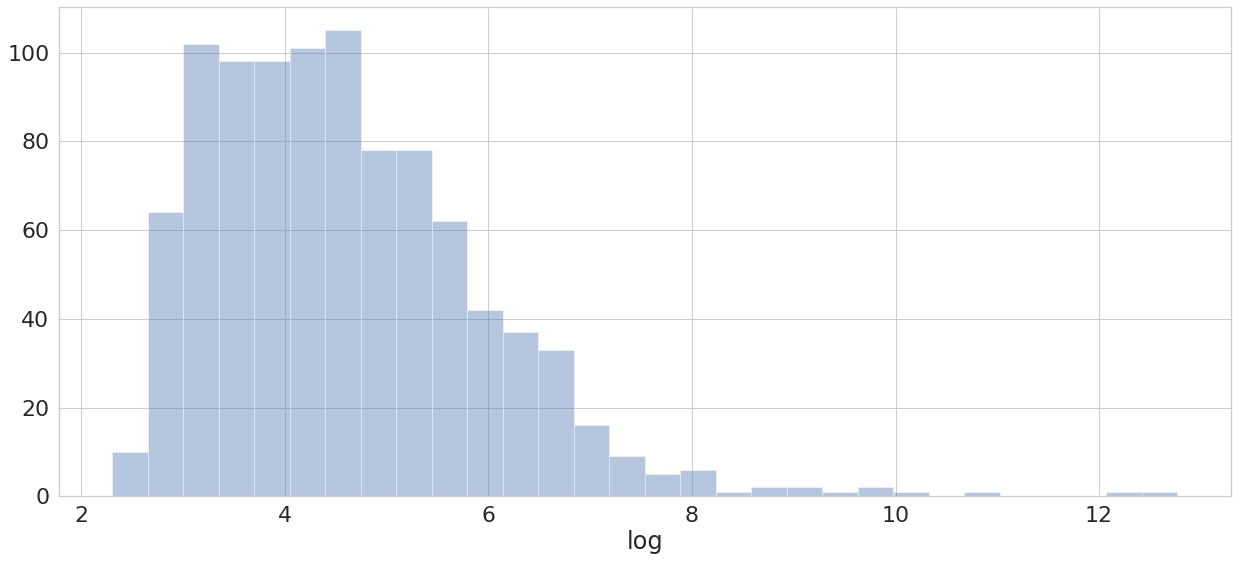

In [18]:
sns.distplot(pivot_table.log, kde=False)

In [19]:
data.date = pd.to_datetime(data.date)

In [20]:
data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [22]:
data_views = data.groupby(['ad_id', 'date'], as_index=False)\
                 .agg({'event':'count'})\
                 .rename(columns = {'event' : 'views'})

In [23]:
data_views.head()

,ad_id,date,views
0,2,2019-04-01,83
1,2,2019-04-02,18
2,3,2019-04-01,158
3,3,2019-04-02,26
4,1902,2019-04-03,34


In [24]:
views_data  = data_views.groupby('date').agg({'views':'count'})

In [25]:
views_mean = data_views.groupby('date', as_index=False).agg({'views':'mean'})

In [26]:
views_mean['views_rolling'] = views_mean.rolling(2,min_periods=1).mean()

In [27]:
views_mean


,date,views,views_rolling
0,2019-04-01,154.482270,154.482270
1,2019-04-02,137.786982,146.134626
2,2019-04-03,163.952778,150.869880
3,2019-04-04,675.901720,419.927249
4,2019-04-05,919.109677,797.505699
5,2019-04-06,277.122727,598.116202


In [28]:
views_mean['module'] = abs(views_mean.views - views_mean.views_rolling)
maxmodule = views_mean.module.idxmax()
maxmodule

5

In [29]:
views_mean.date[views_mean.module.idxmax()]

Timestamp('2019-04-06 00:00:00')

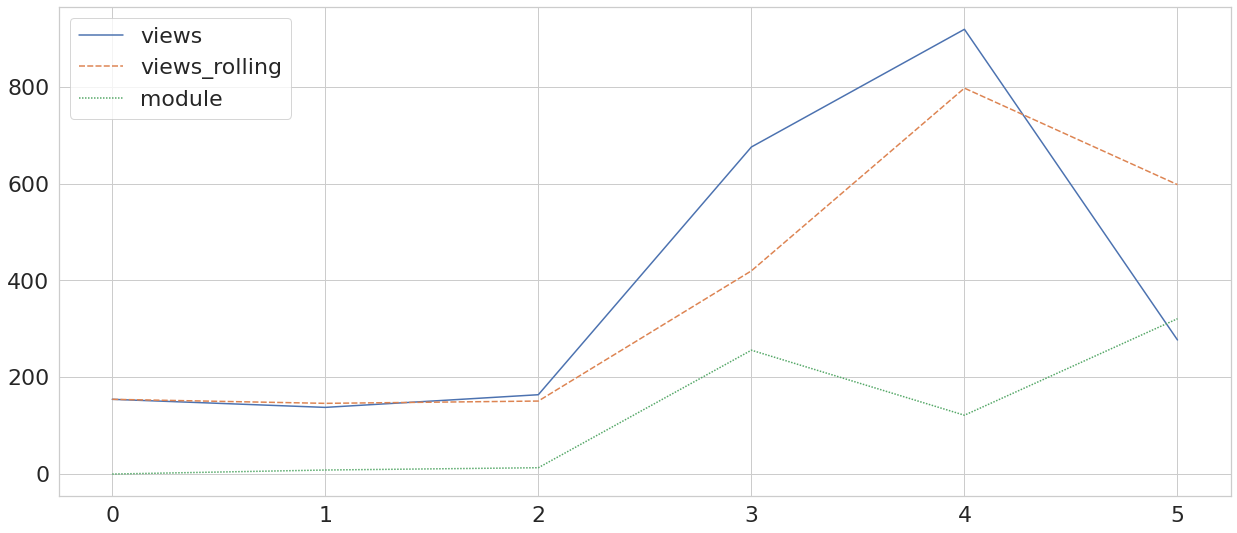

In [30]:
sns.lineplot(data=views_mean)

In [31]:
data_views.head()

,ad_id,date,views
0,2,2019-04-01,83
1,2,2019-04-02,18
2,3,2019-04-01,158
3,3,2019-04-02,26
4,1902,2019-04-03,34


In [148]:
data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [149]:
clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [32]:
def find_minimum_diff(group):
    diff = group.date - group.create_date
    return diff.min()

In [33]:
full_data = data.merge(clients_data.drop(columns=['date', 'community_id' ]))
full_data
full_data.dtypes


date                     datetime64[ns]
time                             object
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
create_date                      object
dtype: object

In [34]:
full_data[['date', 'create_date']] = full_data[['date', 'create_date']].apply(pd.to_datetime)


In [35]:
full_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04


In [36]:
full_data.groupby('client_union_id')\
    .apply(find_minimum_diff)\
    .mean()
   

Timedelta('124 days 15:45:00')

In [37]:
full_data.date = pd.to_datetime(full_data.date)
full_data.create_date = pd.to_datetime(full_data.create_date)
full_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
